<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q1_2_MNIST_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mnist Handwrittern Data Set Classification**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt
import os
from google.colab import files

**Load the MNIST Dataset using Keras library**

In [2]:
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Normalize the DN values in each pixel 

In [3]:
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

Let's look the data, how does it look like? 


The first handwrittern digit is : 5


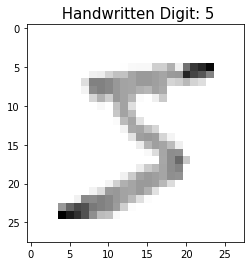

In [4]:
plt.imshow(train_images[0],cmap=plt.cm.binary) # plot in greyscale
plt.title(" Handwritten Digit: 5", fontsize=15)
#plt.show()
print('The first handwrittern digit is :',  train_labels[0])
#plt.savefig("hwd.png")
#files.download("hwd.png")

# **Model training using Deep Neural Network**

**Varying the number of nodes in Hidden Layer 1**

In [5]:
hid=[16,32,64,128]
history={}
for i in range(4):
  model=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(hid[i],activation=tf.nn.relu),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
  )
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history[i]= model.fit(train_images, train_labels, epochs=20,  validation_split=0.1,  batch_size=32)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7354 - accuracy: 0.7879 - val_loss: 0.2158 - val_accuracy: 0.9358
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2368 - accuracy: 0.9298 - val_loss: 0.1649 - val_accuracy: 0.9482
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1827 - accuracy: 0.9452 - val_loss: 0.1437 - val_accuracy: 0.9567
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1452 - accuracy: 0.9560 - val_loss: 0.1294 - val_accuracy: 0.9610
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1330 - accuracy: 0.9587 - val_loss: 0.1339 - val_accuracy: 0.9590
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1157 - accuracy: 0.9636 - val_loss: 0.1256 - val_accuracy: 0.9632
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1062 - accuracy: 0.9667 - val_loss: 0.1194 - val_accuracy:

 **Varying the Number of Nodes in Hidden layer 2**

In [6]:
history1={}
for i in range(4):
  model1=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(hid[i],activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
  )
  model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  history1[i]= model1.fit(train_images, train_labels, epochs=20,  validation_split=0.1,  batch_size=32)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5945 - accuracy: 0.8291 - val_loss: 0.1563 - val_accuracy: 0.9550
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1540 - accuracy: 0.9540 - val_loss: 0.1195 - val_accuracy: 0.9658
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0999 - accuracy: 0.9699 - val_loss: 0.1111 - val_accuracy: 0.9667
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9759 - val_loss: 0.0983 - val_accuracy: 0.9722
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0867 - val_accuracy: 0.9755
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9868 - val_loss: 0.0893 - val_accuracy: 0.9747
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0875 - val_accuracy:

In [7]:
validation_loss, validation_acc =model.evaluate(test_images,test_labels)
print('The validation loss is :',validation_loss)
print('The validation accuracy is :', validation_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9752
The validation loss is : 0.14295700192451477
The validation accuracy is : 0.9751999974250793


In [8]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

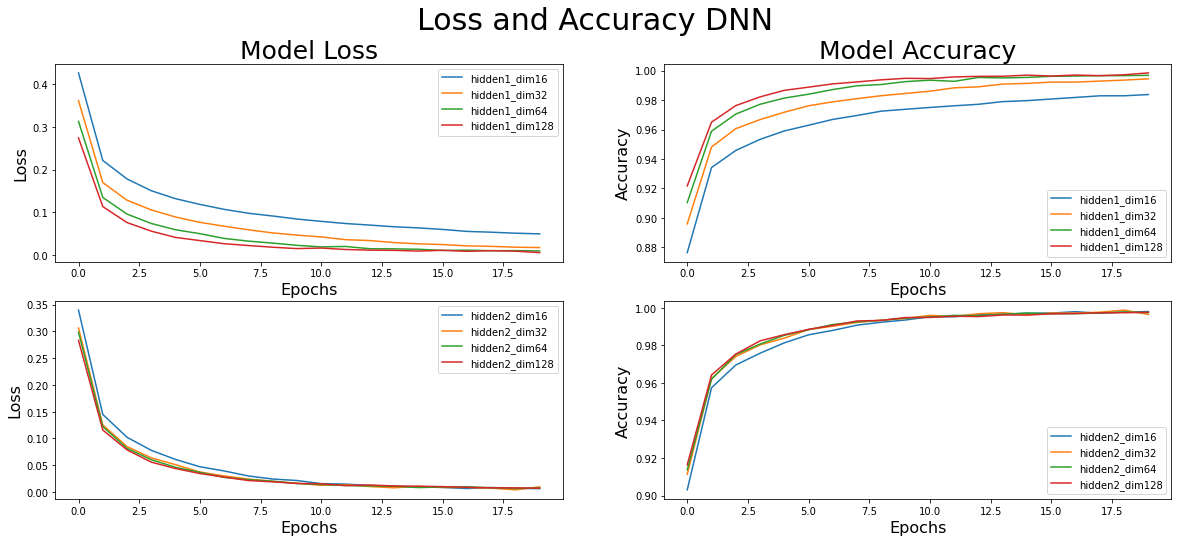

In [9]:
fig =plt.figure(figsize=(20,8))
fig.suptitle('Loss and Accuracy DNN',fontsize=30)
#ax1
ax1 = fig.add_subplot(2,2,1)
ax1.plot(history[0].history['loss'],label='hidden1_dim16')
ax1.plot(history[1].history['loss'],label='hidden1_dim32')
ax1.plot(history[2].history['loss'],label='hidden1_dim64')
ax1.plot(history[3].history['loss'],label='hidden1_dim128')
ax1.set_title("Model Loss",fontsize=25)
ax1.set_xlabel('Epochs',fontsize=16)
ax1.legend(loc='best')
ax1.set_ylabel('Loss',fontsize=16)
#ax2
ax2 = fig.add_subplot(2,2,2)
ax2.plot(history[0].history['accuracy'],label='hidden1_dim16') 
ax2.plot(history[1].history['accuracy'],label='hidden1_dim32') 
ax2.plot(history[2].history['accuracy'],label='hidden1_dim64') 
ax2.plot(history[3].history['accuracy'],label='hidden1_dim128')    
ax2.set_title("Model Accuracy",fontsize=25)
ax2.set_xlabel('Epochs',fontsize=16)
ax2.legend(loc='best')
ax2.set_ylabel('Accuracy',fontsize=16)
#ax3
ax3 = fig.add_subplot(2,2,3)
ax3.plot(history1[0].history['loss'],label='hidden2_dim16')
ax3.plot(history1[1].history['loss'],label='hidden2_dim32')
ax3.plot(history1[2].history['loss'],label='hidden2_dim64')
ax3.plot(history1[3].history['loss'],label='hidden2_dim128')
ax3.set_xlabel('Epochs',fontsize=16)
ax3.legend(loc='best')
ax3.set_ylabel('Loss',fontsize=16)
#ax4
ax4 = fig.add_subplot(2,2,4)
ax4.plot(history1[0].history['accuracy'],label='hidden2_dim16') 
ax4.plot(history1[1].history['accuracy'],label='hidden2_dim32') 
ax4.plot(history1[2].history['accuracy'],label='hidden2_dim64') 
ax4.plot(history1[3].history['accuracy'],label='hidden2_dim128')    
ax4.set_xlabel('Epochs',fontsize=16)
ax4.legend(loc='best')
ax4.set_ylabel('Accuracy',fontsize=16)

# Show the figure
fig.show()
# Download the figure
fig.savefig("Q1_2_LossAcc.png")
files.download("Q1_2_LossAcc.png")



# **Model training with Convolutional neural networks (CNN)**

In [ ]:
x_train=train_images.reshape(60000,28,28,1)
y_train, y_test = train_labels, test_labels
x_test=test_images.reshape(10000,28,28,1)
hid1=[32,64,128]
history_CNN={}
# Define the model
for i in range(3):
  model_CNN= tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape= (28,28,1)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(hid1[i],activation='relu'),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(10,activation='softmax')
    ] 
  )
  # train the model 
  model_CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  # fit the model
  history_CNN[i]= model_CNN.fit(x_train,y_train,epochs=10, validation_split=0.3,batch_size=32)
  #model_CNN.evaluate(x_test,y_test)


Epoch 1/10
1313/1313 [==============================] - 65s 49ms/step - loss: 0.5557 - accuracy: 0.8162 - val_loss: 0.1131 - val_accuracy: 0.9648
Epoch 2/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0850 - accuracy: 0.9733 - val_loss: 0.0953 - val_accuracy: 0.9710
Epoch 3/10
1313/1313 [==============================] - 65s 49ms/step - loss: 0.0624 - accuracy: 0.9799 - val_loss: 0.0583 - val_accuracy: 0.9831
Epoch 4/10
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0544 - val_accuracy: 0.9839
Epoch 5/10
1313/1313 [==============================] - 62s 48ms/step - loss: 0.0348 - accuracy: 0.9881 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 6/10
1313/1313 [==============================] - 62s 47ms/step - loss: 0.0240 - accuracy: 0.9918 - val_loss: 0.0514 - val_accuracy: 0.9847
Epoch 7/10
1313/1313 [==============================] - 64s 49ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0494 -

In [ ]:
model_CNN.summary()

In [ ]:
fig =plt.figure(figsize=(20,8))
fig.suptitle('Loss and Accuracy in CNN',fontsize=30)
#ax1
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history_CNN[0].history['loss'],label='hidden1_dim32')
ax1.plot(history_CNN[1].history['loss'],label='hidden1_dim64')
ax1.plot(history_CNN[2].history['loss'],label='hidden1_dim128')
ax1.set_title("Model Loss",fontsize=25)
ax1.set_xlabel('Epochs',fontsize=16)
ax1.legend(loc='best')
ax1.set_ylabel('Loss',fontsize=16)
#ax2
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history_CNN[0].history['accuracy'],label='hidden1_dim32')  
ax2.plot(history_CNN[1].history['accuracy'],label='hidden1_dim64') 
ax2.plot(history_CNN[2].history['accuracy'],label='hidden1_dim128')    
ax2.set_title("Model Accuracy",fontsize=25)
ax2.set_xlabel('Epochs',fontsize=16)
ax2.legend(loc='best')
ax2.set_ylabel('Accuracy',fontsize=16)


# Show the figure
fig.show()
# Download the figure
fig.savefig("Q1_2_LossAccCNN.png")
files.download("Q1_2_LossAccCNN.png")
